# Regression Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA & CLEANING

In [2]:
df = pd.read_csv("model.csv")

In [3]:
df.shape

(12000, 23)

- bitrate --> bitrate refers to the number of bits that are conveyed or processed in a given unit of time
- i --> i-frame is a complete picture
- p --> p-prame holds only the changes in the image from the previous frame.
- b --> b-frame saves even more space by using differences between the current frame and both the preceding and following frames to specify its content.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           12000 non-null  int64  
 1   duration     12000 non-null  float64
 2   codec        12000 non-null  object 
 3   width        12000 non-null  int64  
 4   height       12000 non-null  int64  
 5   bitrate      12000 non-null  int64  
 6   category     12000 non-null  object 
 7   framerate    12000 non-null  float64
 8   i            12000 non-null  int64  
 9   p            12000 non-null  int64  
 10  b            12000 non-null  int64  
 11  frames       12000 non-null  int64  
 12  i_size       12000 non-null  int64  
 13  p_size       12000 non-null  int64  
 14  b_size       12000 non-null  int64  
 15  size         12000 non-null  int64  
 16  o_codec      12000 non-null  object 
 17  o_bitrate    12000 non-null  int64  
 18  o_framerate  12000 non-null  float64
 19  o_wi

In [5]:
df.isnull().sum()

id             0
duration       0
codec          0
width          0
height         0
bitrate        0
category       0
framerate      0
i              0
p              0
b              0
frames         0
i_size         0
p_size         0
b_size         0
size           0
o_codec        0
o_bitrate      0
o_framerate    0
o_width        0
o_height       0
umem           0
utime          0
dtype: int64

In [6]:
pd.set_option("display.max_columns", None)

In [7]:
cat_cols = df.select_dtypes("object")

This column has  4  unique values.


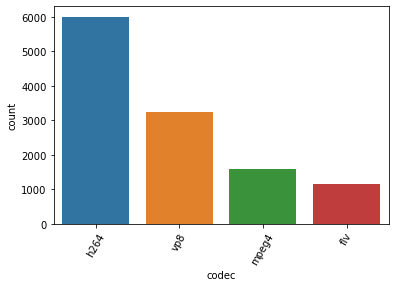

This column has  16  unique values.


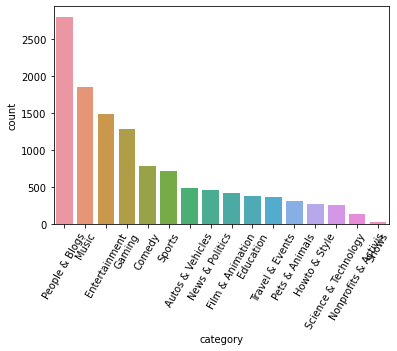

This column has  4  unique values.


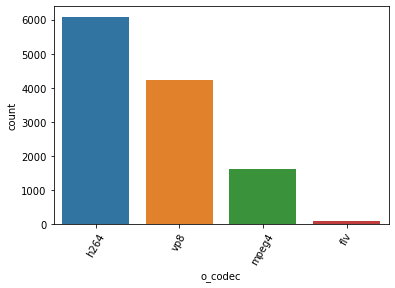

In [8]:
for i in cat_cols:
    sns.countplot(x=i, data=df, order=df[i].value_counts().index)
    plt.xticks(rotation=60)
    print("This column has ",cat_cols[i].nunique()," unique values.")
    plt.show()

In [9]:
num_cols = df.select_dtypes(exclude=["object"])

/Users/alessandro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

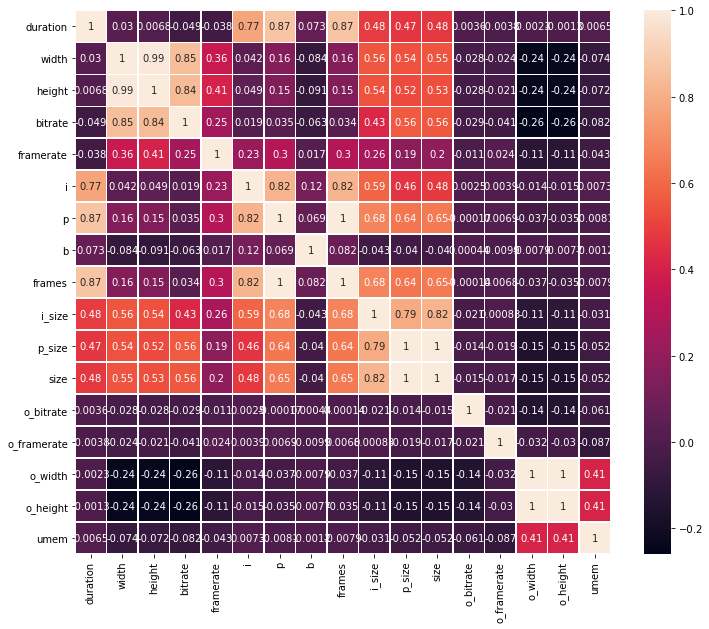

In [10]:
num_cols.drop(columns=["id","utime","b_size","b_size"], axis=1, inplace=True)
corr_mat = num_cols.corr()
plt.figure(figsize=[12,10])
sns.heatmap(corr_mat, annot=True, linewidth=.5)

In [11]:
def correlation(dataset, threshold):
    col_corr = []
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold and (corr_matrix.columns[i] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [12]:
corr_features = correlation(num_cols, 0.9)

In [13]:
df.drop(columns=corr_features, axis=1, inplace=True)

In [543]:
num_cols = df.select_dtypes(exclude=["object"])
num_cols.drop("id", axis=1, inplace=True)

Text(0, 0.5, 'Count')

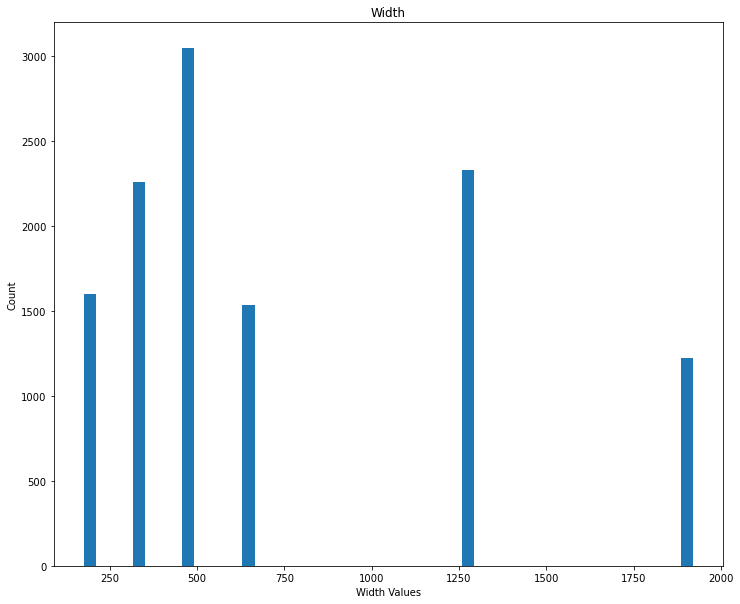

In [17]:
plt.figure(figsize=[12,10])
plt.hist(df[["width"]], bins=50)
plt.title('Width')
plt.xlabel('Width Values')
plt.ylabel('Count')


[[<AxesSubplot:title={'center':'duration'}>]]
[[<AxesSubplot:title={'center':'width'}>]]
[[<AxesSubplot:title={'center':'bitrate'}>]]
[[<AxesSubplot:title={'center':'framerate'}>]]
[[<AxesSubplot:title={'center':'i'}>]]
[[<AxesSubplot:title={'center':'p'}>]]
[[<AxesSubplot:title={'center':'b'}>]]
[[<AxesSubplot:title={'center':'i_size'}>]]
[[<AxesSubplot:title={'center':'p_size'}>]]
[[<AxesSubplot:title={'center':'b_size'}>]]
[[<AxesSubplot:title={'center':'o_bitrate'}>]]
[[<AxesSubplot:title={'center':'o_framerate'}>]]
[[<AxesSubplot:title={'center':'o_width'}>]]
[[<AxesSubplot:title={'center':'umem'}>]]
[[<AxesSubplot:title={'center':'utime'}>]]


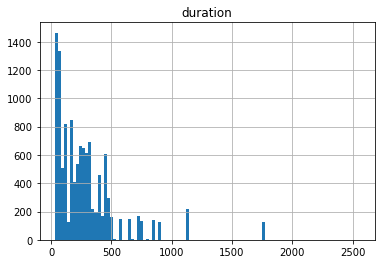

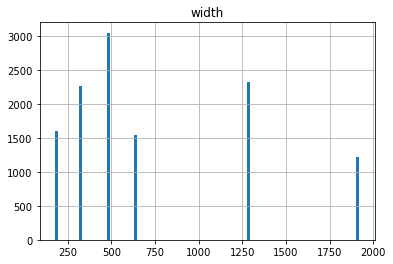

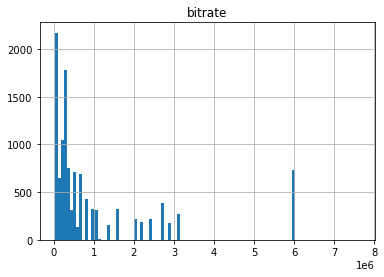

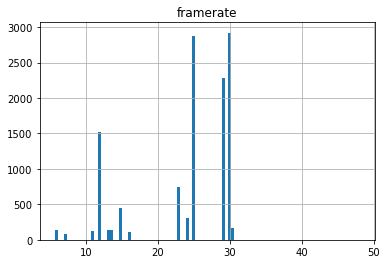

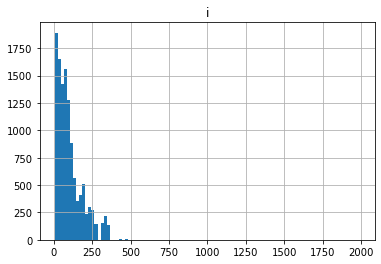

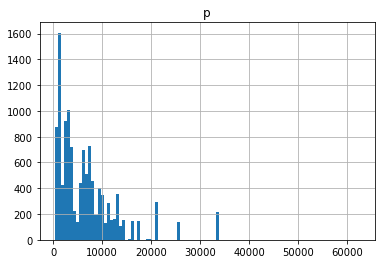

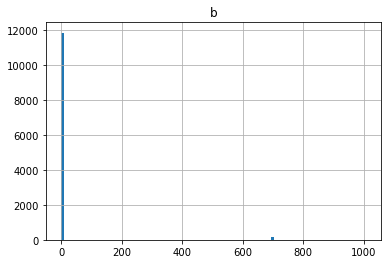

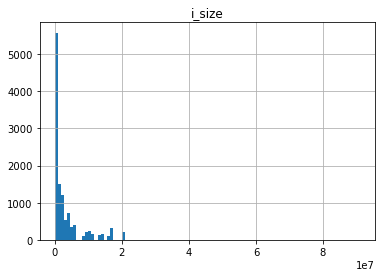

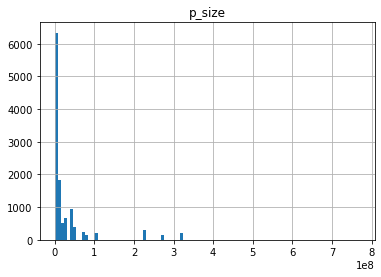

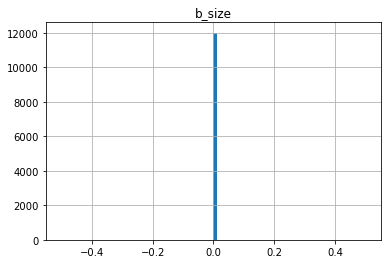

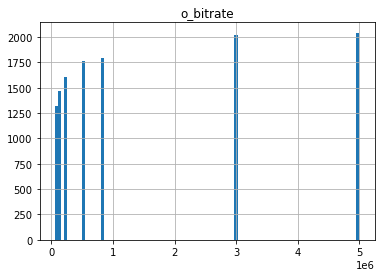

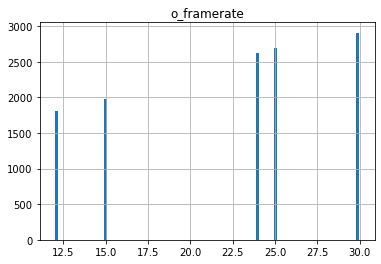

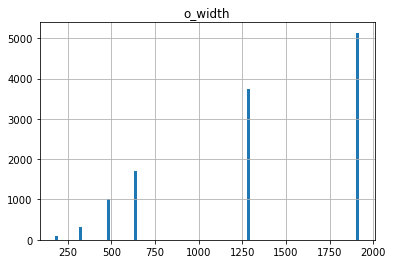

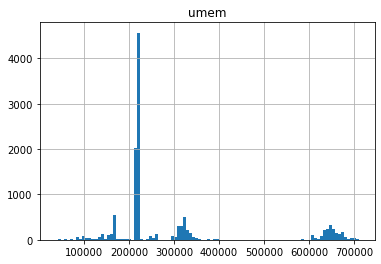

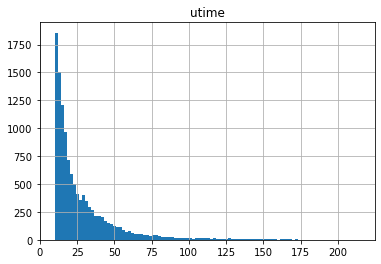

In [544]:
%matplotlib inline
for i in num_cols.columns:
    print(df.hist(column=i, bins=100))

In [545]:
df["bitrate"].value_counts()

5992818    418
5999648    311
3080852    267
2759449    239
2052426    220
          ... 
795456       1
2503282      1
55775        1
842175       1
274438       1
Name: bitrate, Length: 264, dtype: int64

In [546]:
df

,id,duration,codec,width,bitrate,category,framerate,i,p,b,i_size,p_size,b_size,o_codec,o_bitrate,o_framerate,o_width,umem,utime
0,1,645.840000,vp8,320,95903,People & Blogs,25.032558,138,16008,0,1081321,6660941,0,vp8,109000,29.97,1280,218932,15.929
1,2,326.588320,h264,1920,5999648,People & Blogs,23.000000,174,7656,0,16603953,228322925,0,flv,820000,29.97,1920,218932,10.417
2,3,473.000000,h264,320,164017,Sports,25.000000,198,10924,704,1419320,8047423,0,h264,242000,24.00,1920,645544,45.327
3,4,448.575000,vp8,1280,2052426,Gaming,30.002232,92,13349,0,9132637,105950761,0,h264,3000000,15.00,1920,655172,102.842
4,5,255.280000,flv,320,250276,Music,25.000000,110,6272,0,611474,7374864,0,mpeg4,820000,25.00,1920,216820,14.937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,49.178333,mpeg4,176,54338,Comedy,7.000000,10,334,0,33046,300986,0,h264,5000000,29.97,1280,324540,34.462
11996,11997,80.536000,h264,480,690041,Travel & Events,29.000000,43,2374,0,618732,6327913,0,h264,820000,15.00,1920,654236,68.984
11997,11998,750.433000,vp8,1280,794075,Gaming,13.482667,81,10031,0,3852576,70635013,0,h264,820000,29.97,1280,327492,33.402
11998,11999,473.000000,h264,320,164017,Entertainment,25.000000,198,10924,704,1419320,8047423,0,h264,242000,25.00,1280,318500,30.266


In [547]:
#df[df["o_width"]>1750]["utime"].mean()

In [548]:
#df["o_width_top"]=np.where(df["o_width"]>1750,1,0)
#df["o_bitrate_top"]=np.where(df["o_bitrate"]>4000000,1,0)
#df["umem>500k"] = np.where(df["umem"]>500000,1,0)

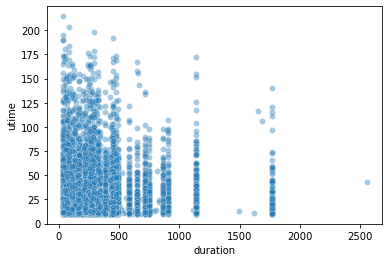

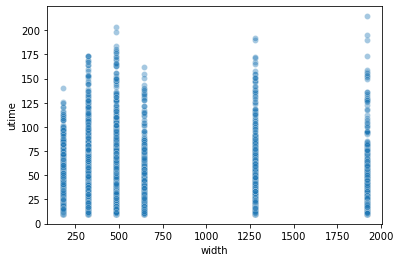

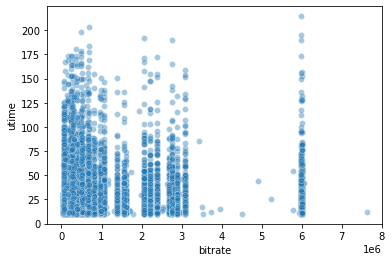

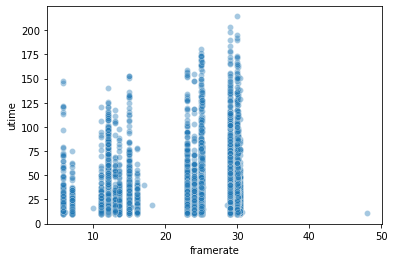

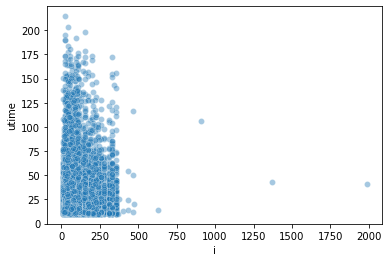

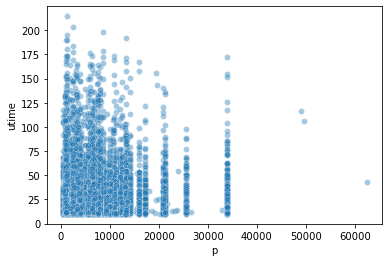

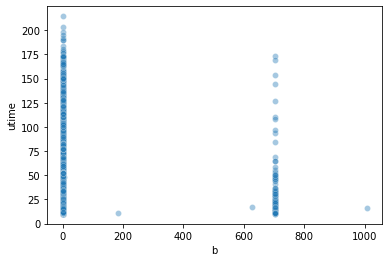

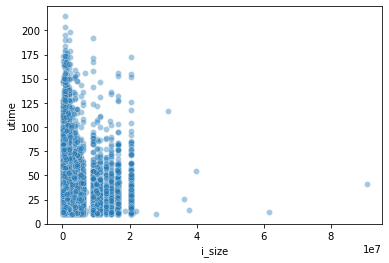

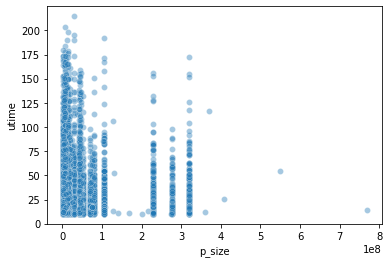

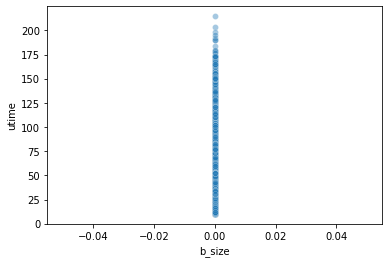

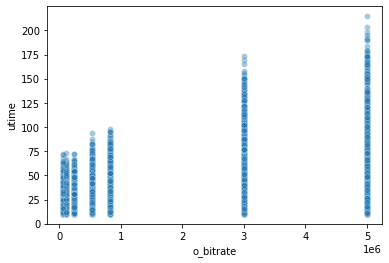

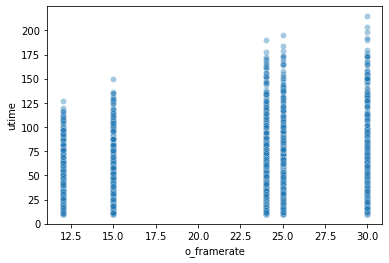

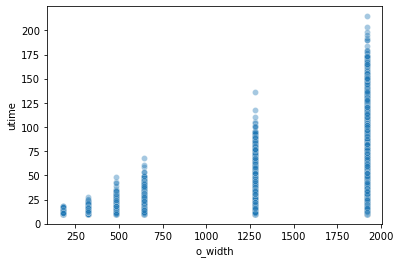

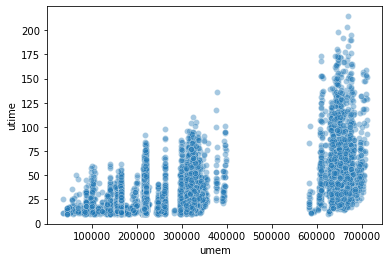

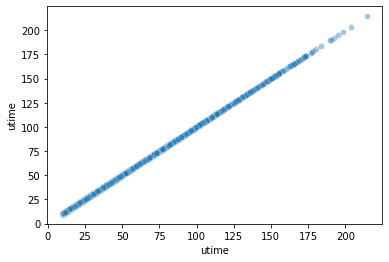

In [549]:
for i in num_cols.columns:
    sns.scatterplot(x=df[i],y=df["utime"], alpha=0.4)
    plt.show()

In [550]:
#df["i_size=1"] = np.where(df["i_size"]==1,1,0)

In [551]:
df["umem"] = pd.qcut(df["umem"],4,labels=False)

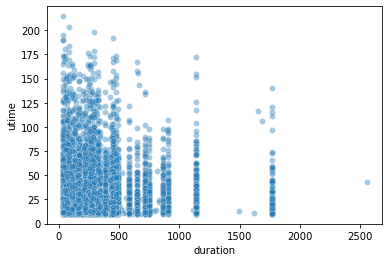

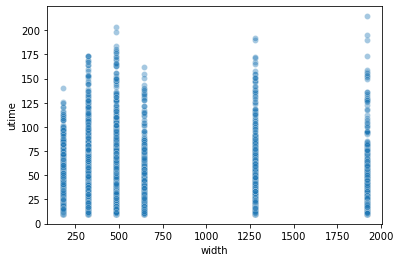

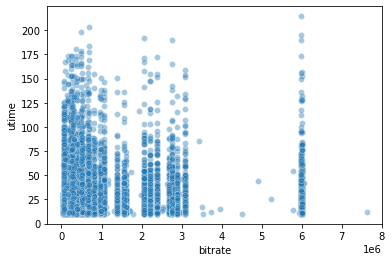

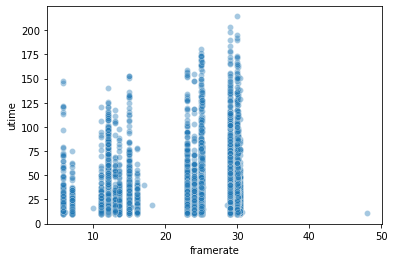

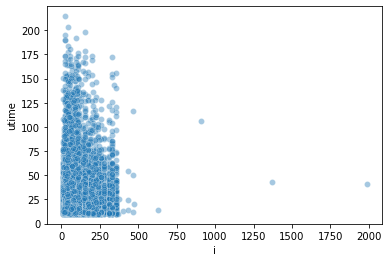

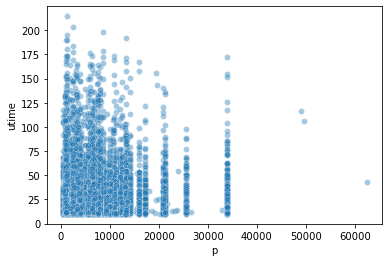

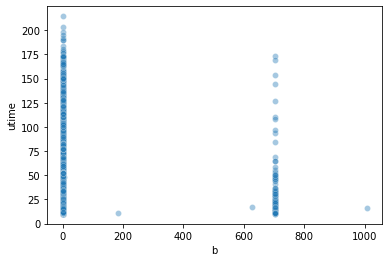

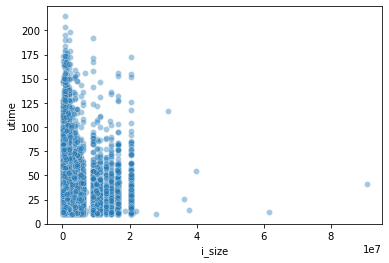

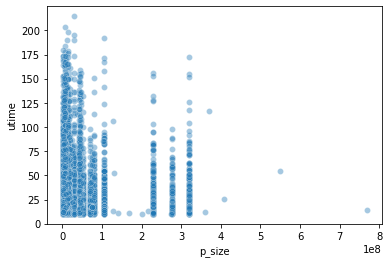

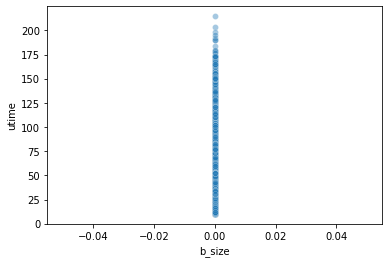

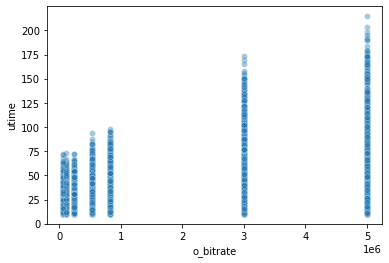

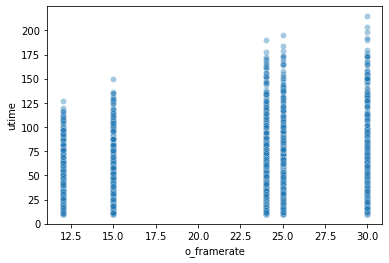

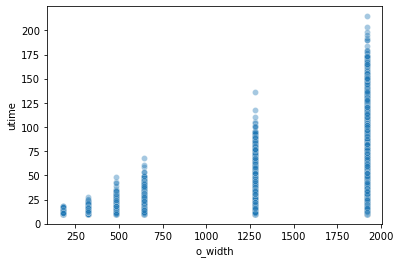

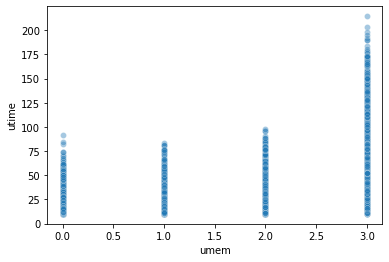

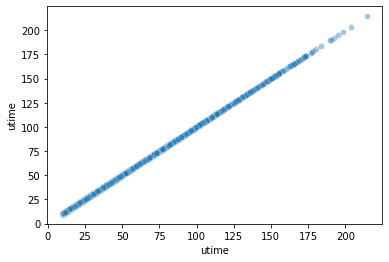

In [552]:
for i in num_cols.columns:
    sns.scatterplot(x=df[i],y=df["utime"], alpha=0.4)
    plt.show()

In [553]:
df["umem"].isnull().sum()

0

### Notice that some of the column are in reality categorical, others instead like "b" and b_size should be dropped

##### Here we show why this variable should be dropped: extremely imbalanced and no statistical evidence that is meaningful

In [554]:
df["b_size"].unique()

array([0])

In [555]:
df["b"].value_counts()

0       11853
704       143
1007        1
6           1
626         1
184         1
Name: b, dtype: int64

In [556]:
check = df[df["b"]==704]

In [557]:
print(check["utime"].mean(), df["utime"].mean(), check["utime"].median(), df["utime"].median())

30.84464335664335 28.092689333333286 20.457 19.437


In [558]:
df.drop(columns=["b","b_size"], inplace=True)

In [559]:
df.set_index("id", inplace=True)

In [560]:
almost_cat = df[["width","o_framerate","o_width","o_bitrate"]]

#### Checking the unique values for each variable

In [561]:
for i in almost_cat:
    print(df[i].unique())

[ 320 1920 1280  640  480  176]
[29.97 24.   15.   25.   12.  ]
[1280 1920  640  480  320  176]
[ 109000  820000  242000 3000000 5000000  539000   56000]


AxesSubplot(0.125,0.125;0.775x0.755)


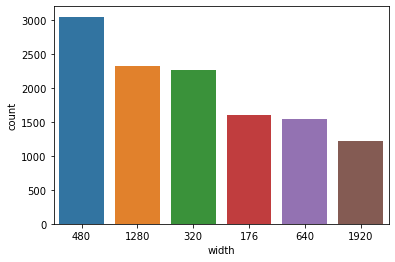

AxesSubplot(0.125,0.125;0.775x0.755)


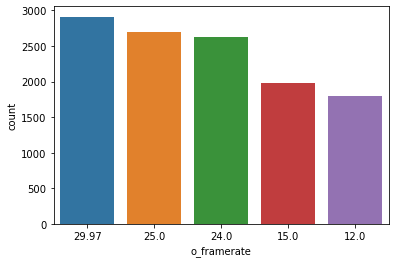

AxesSubplot(0.125,0.125;0.775x0.755)


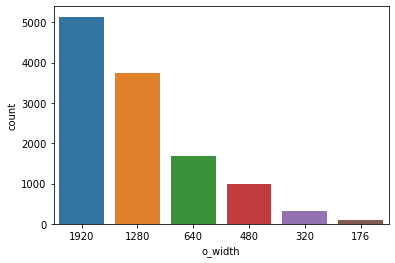

AxesSubplot(0.125,0.125;0.775x0.755)


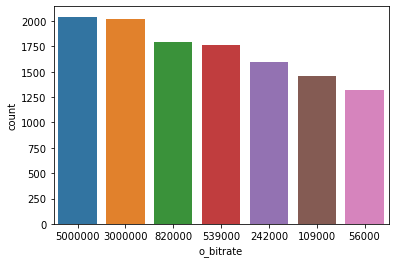

In [562]:
%matplotlib inline
for i in almost_cat:
    print(sns.countplot(x=i, data=df, order=df[i].value_counts().index))
    plt.show()

### These variables are ordinal but the values inside vary a lot--> We are trying both to apply label encoding and one-hot-encoding to check the difference on the models' metrics

### Here I apply log_transform to exponentially distributed variables

In [563]:
""""for i in log:
    for j in df[i]:
        if j > np.percentile(df[i], 95):
            df[i].replace(j,np.nan, inplace=True)"""

'"for i in log:\n    for j in df[i]:\n        if j > np.percentile(df[i], 95):\n            df[i].replace(j,np.nan, inplace=True)'

In [564]:
#df.dropna(inplace=True, axis=0)

In [565]:
#log.remove("p_size")

In [566]:
log = ["duration", "i","i_size","p_size","p","bitrate"] 

In [567]:
for i in log:
    df[i].clip(0, np.percentile(df[i], 90), inplace=True)

In [568]:
from scipy.stats import boxcox

In [569]:
df["utime"] =  np.log(df["utime"])

In [570]:
for i in log:
    df[i] = np.log(df[i])

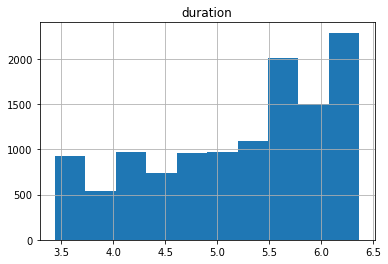

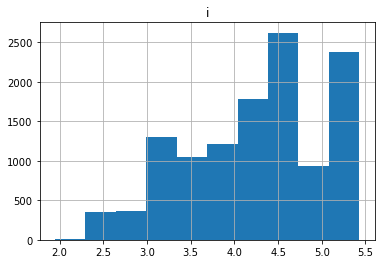

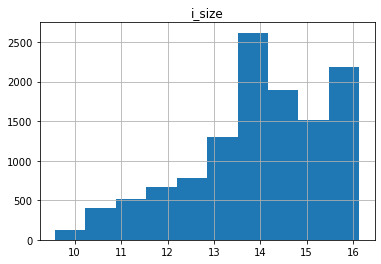

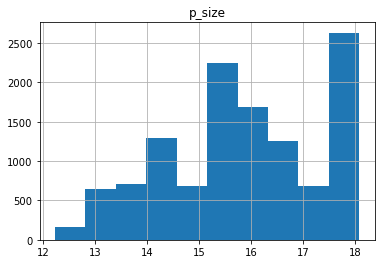

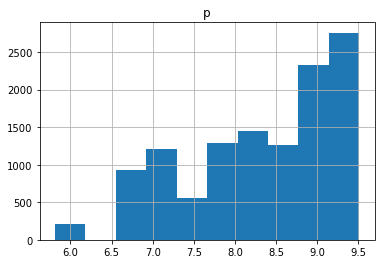

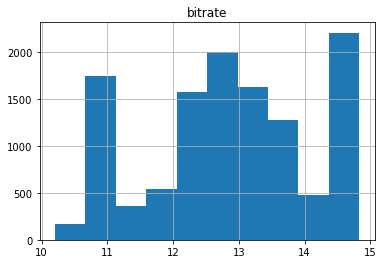

In [571]:
for i in log:
    df.hist(column=i)

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### ANOVA TEST 

In [20]:
cat_cols.columns

Index(['codec', 'category', 'o_codec'], dtype='object')

In [574]:
mod = ols("utime~codec", data=df).fit()
aov = sm.stats.anova_lm(mod, type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
codec,3.0,8.425408,2.808469,7.371591,0.000062
Residual,11996.0,4570.302286,0.380986,NaN,NaN


#### The p.value is < than 0.05 and we conclude that the categories in "codec" have a different impact on  "utime"

In [575]:
mod = ols("utime~category", data=df).fit()
aov = sm.stats.anova_lm(mod, type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
category,15.0,5.952230,0.396815,1.039945,0.409295
Residual,11984.0,4572.775464,0.381573,NaN,NaN


#### The p.value is > than 0.05 and we conclude that the categories in "categories" do not have a different impact on "utime"

In [576]:
mod = ols("utime~o_codec", data=df).fit()
aov = sm.stats.anova_lm(mod, type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
o_codec,3.0,800.072357,266.690786,846.656384,0.0
Residual,11996.0,3778.655337,0.314993,NaN,NaN


#### Weird that the result is exactly 0 and the mean_sq is extremely high

#### The p.value is < than 0.05 and we conclude that the categories in "o_codec" have a different impact on "utime"

In [577]:
almost_cat.columns

Index(['width', 'o_framerate', 'o_width', 'o_bitrate'], dtype='object')

In [578]:
mod = ols("utime~width", data=df).fit()
aov = sm.stats.anova_lm(mod, type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
width,1.0,3.175530,3.17553,8.326865,0.003913
Residual,11998.0,4575.552164,0.38136,NaN,NaN


#### The p.value is < than 0.05 and we conclude that the categories in "width" have a different impact on "utime"d

In [579]:
mod = ols("utime~o_framerate", data=df).fit()
aov = sm.stats.anova_lm(mod, type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
o_framerate,1.0,18.357567,18.357567,48.297414,3.851914e-12
Residual,11998.0,4560.370127,0.380094,NaN,NaN


#### The p.value is < than 0.05 and we conclude that the categories in "o_framrate" have a different impact on "utime

In [580]:
mod = ols("utime~o_width", data=df).fit()
aov = sm.stats.anova_lm(mod, type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
o_width,1.0,863.284073,863.284073,2787.737715,0.0
Residual,11998.0,3715.443621,0.309672,NaN,NaN


#### The p.value is 0 (weird) and we conclude that the categories in "o_width" have a different impact on "utime¶


In [581]:
mod = ols("utime~o_bitrate", data=df).fit()
aov = sm.stats.anova_lm(mod, type=2)
aov

,df,sum_sq,mean_sq,F,PR(>F)
o_bitrate,1.0,217.506701,217.506701,598.374951,5.297789e-129
Residual,11998.0,4361.220993,0.363496,NaN,NaN


#### The p.value is almost 0 and we conclude that the categories in "o_bitrate" have a different impact on "utime¶

In [582]:
df.drop(columns=["category"], axis=1, inplace=True)

#### Label Encoding

In [583]:
#almost_cat.drop("width", axis=1, inplace=True)

In [584]:
for i in almost_cat:
    df[i] = df[i].apply(lambda x: sorted(df[i].unique()).index(x))

#### One-Hot-Encoding

In [585]:
cat_cols.drop("category", axis=1, inplace=True)

/Users/alessandro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [586]:
df = pd.get_dummies(df, columns=cat_cols.columns, drop_first=True)

In [587]:
df = pd.get_dummies(df, columns=["umem"], drop_first=True)

## MACHINE LEARNING

In [588]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

### Lasso Regression

In [589]:
from sklearn.linear_model import LinearRegression

In [590]:
scaler = MinMaxScaler()

In [591]:
lr = LinearRegression()

In [592]:
X = df.drop("utime", axis=1)
y = df.loc[:,"utime"]

In [593]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [594]:
#df[["bitrate","p","duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]])

In [595]:
df[["duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [596]:
lasso = Lasso()
param_grid = {"alpha": [0.000001,0.00001,0.0001], 
              "normalize": [True, False]}

CV_lasso = GridSearchCV(lasso, param_grid, cv=3)
CV_lasso.fit(x_train,y_train)
lasso_coef = CV_lasso.best_estimator_.coef_

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')
print("Best score: %f using %s" % (CV_lasso.best_score_, CV_lasso.best_params_))
means = CV_lasso.cv_results_['mean_test_score']
stds = CV_lasso.cv_results_['std_test_score']
params = CV_lasso.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#test on hold-out
CV_lasso.score(x_test, y_test)

***GRIDSEARCH RESULTS***
Best score: 0.769785 using {'alpha': 1e-06, 'normalize': True}
0.769785 (0.001902) with: {'alpha': 1e-06, 'normalize': True}
0.769773 (0.001821) with: {'alpha': 1e-06, 'normalize': False}
0.769066 (0.002518) with: {'alpha': 1e-05, 'normalize': True}
0.769776 (0.001837) with: {'alpha': 1e-05, 'normalize': False}
0.748826 (0.004578) with: {'alpha': 0.0001, 'normalize': True}
0.769757 (0.001999) with: {'alpha': 0.0001, 'normalize': False}


0.7815733356698562

In [597]:
lr.fit(x_train, y_train)

LinearRegression()

In [598]:
y_pred = lr.predict(x_test)

In [599]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [600]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))

r2 score is 0.7312034098262419 :


In [601]:
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))

MAE score is 6.867860863274122 :


In [602]:
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

MSE score is 153.81490489768143 :


### DecisionTreeRegressor

In [603]:
from sklearn.tree import DecisionTreeRegressor

In [604]:
scaler = MinMaxScaler()

In [605]:
tree = DecisionTreeRegressor()

In [606]:
X = df.drop("utime", axis=1)
y = df.loc[:,"utime"]

In [607]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [609]:
df[["duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [610]:
tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [611]:
y_pred = tree.predict(x_test)

In [612]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [613]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))

r2 score is 0.9506041495997661 :


In [614]:
#from scipy.special import inv_boxcox

In [615]:
#y_test1 = inv_boxcox(y_test, -1)
#y_pred1 = inv_boxcox(y_pred, -1)

In [616]:
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))

MAE score is 2.7519844444444437 :


In [617]:
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

MSE score is 28.266050647222208 :


### Bayesian Ridge Regressor

In [618]:
from sklearn.linear_model import BayesianRidge

In [619]:
scaler = MinMaxScaler()

In [620]:
br= BayesianRidge()

In [621]:
X = df.drop("utime", axis=1)
y = df.loc[:,"utime"]

In [622]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [623]:
df[["duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [624]:
br.fit(x_train, y_train)

BayesianRidge()

In [625]:
y_pred = br.predict(x_test)

In [626]:
print("r2 score is {} :".format(r2_score(y_test, y_pred)))

r2 score is 0.7816274241547401 :


### RandomForrestRegressor

In [627]:
from sklearn.ensemble import RandomForestRegressor

In [628]:
scaler = MinMaxScaler()

In [629]:
rfr = RandomForestRegressor()

In [630]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [631]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [632]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [633]:
#df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]])

In [634]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [635]:
y_pred = rfr.predict(x_test)

In [636]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [637]:
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))

MAE score is 2.199945255916435 :


In [638]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.9727434067461384 :
MAE score is 2.199945255916435 :
MSE score is 15.597185576153977 :


Text(0, 0.5, 'Expected y')

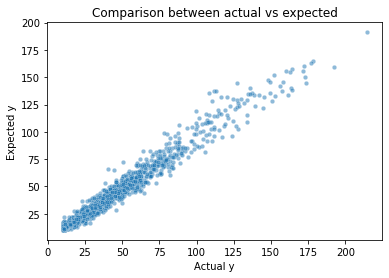

In [639]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.5,s=20)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

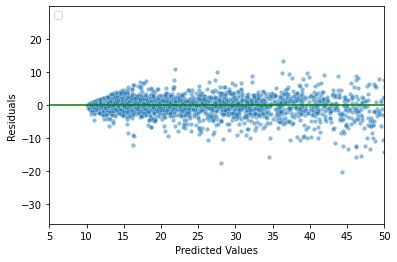

In [640]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

(array([   4.,   12.,   21.,   78.,  323., 2864.,  261.,   24.,    8.,
           5.]),
 array([-33.06391206, -27.0602095 , -21.05650695, -15.0528044 ,
         -9.04910184,  -3.04539929,   2.95830327,   8.96200582,
         14.96570838,  20.96941093,  26.97311349]),
 <BarContainer object of 10 artists>)

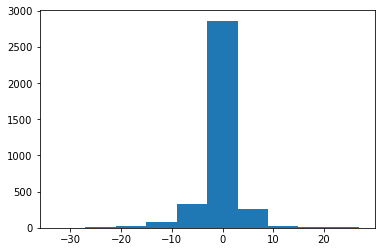

In [641]:
plt.hist(y_pred1-y_test1)

### GradientBoostingRegressor (already-Tuned)

In [642]:
from sklearn.ensemble import GradientBoostingRegressor

In [643]:
scaler = MinMaxScaler()

In [644]:
gbr = GradientBoostingRegressor(n_estimators=1200,criterion="friedman_mse",learning_rate=0.60,
                                 min_samples_split=8, min_samples_leaf=3)

In [645]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [646]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [647]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [648]:
#df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]])

In [649]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.6, min_samples_leaf=3,
                          min_samples_split=8, n_estimators=1200)

In [650]:
y_pred = gbr.predict(x_test)

In [651]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [653]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.991064638514852 :
MAE score is 1.235782777807155 :
MSE score is 5.113129508733691 :


Text(0, 0.5, 'Expected y')

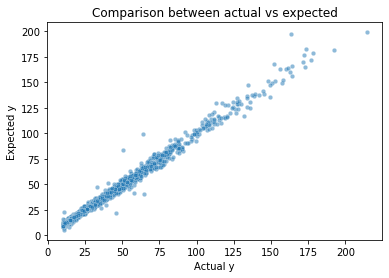

In [654]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.5,s=20)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

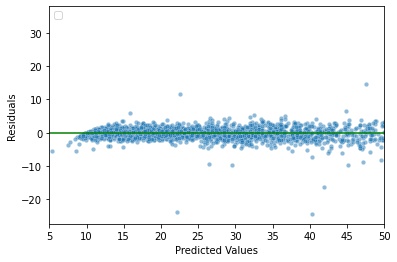

In [655]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])


In [657]:
""""import shap  
import matplotlib.pyplot as pl

explainer_rf = shap.TreeExplainer(gbr,categorical_features=x_train.columns[:5])
shap_values = explainer_rf.shap_values(x_train)

shap.summary_plot(shap_values, x_train, plot_type="bar")
pl.savefig("summary_plot.pdf")
shap.initjs()
a=shap.force_plot(explainer_rf.expected_value, shap_values, x_train)
#a.figure.savefig('Features_explanation2.png', facecolor=b.get_facecolor(), transparent=True
i=10
expected_value = shap_values[i,-1]

a=shap.force_plot(expected_value, shap_values[i,:], x_train.iloc[i,:])
#a.figure.savefig('Features_explanation1.png', facecolor=b.get_facecolor(), transparent=True)
X_train_summary = shap.kmeans(x_train, 10)
# explain all the predictions in the test set
explainer = shap.KernelExplainer(gbr.predict, X_train_summary)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train)



SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-657-f07712423d04>, line 22)

In [ ]:
plt.hist(y_pred1-y_test1)

### AdaBoostRegressor

In [658]:
from sklearn.ensemble import AdaBoostRegressor

In [659]:
scaler = MinMaxScaler()

In [660]:
abr = AdaBoostRegressor()

In [661]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [662]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [663]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [664]:
#df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]])

In [665]:
abr.fit(x_train, y_train)

AdaBoostRegressor()

In [666]:
y_pred = abr.predict(x_test)

In [667]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [668]:
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))

MAE score is 7.69293245528434 :


In [669]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.7259921723619933 :
MAE score is 7.69293245528434 :
MSE score is 156.79695907643602 :


Text(0, 0.5, 'Expected y')

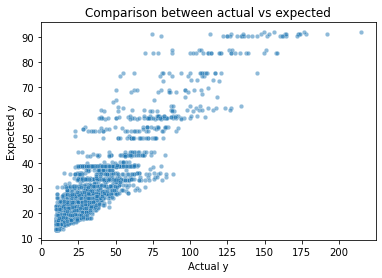

In [670]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.5,s=20)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

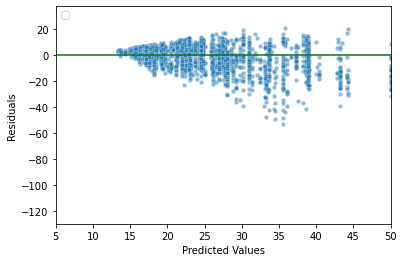

In [671]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

(array([1.000e+00, 1.000e+00, 6.000e+00, 1.700e+01, 2.000e+01, 7.600e+01,
        2.320e+02, 1.001e+03, 2.212e+03, 3.400e+01]),
 array([-122.50383157, -107.28220259,  -92.06057361,  -76.83894463,
         -61.61731565,  -46.39568667,  -31.17405769,  -15.95242871,
          -0.73079973,   14.49082925,   29.71245823]),
 <BarContainer object of 10 artists>)

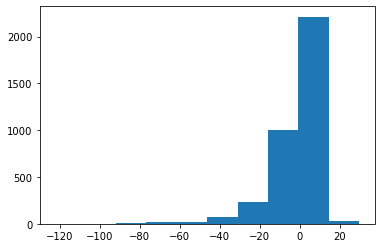

In [672]:
plt.hist(y_pred1-y_test1)

### Neural Network

In [673]:
from sklearn.neural_network import MLPRegressor

In [674]:
scaler = MinMaxScaler()

In [675]:
mlpr = MLPRegressor()

In [676]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [677]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [678]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [679]:
#df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]])

In [680]:
mlpr.fit(x_train, y_train)

MLPRegressor()

In [681]:
y_pred = mlpr.predict(x_test)

In [682]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [683]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.9376360238349934 :
MAE score is 3.4290628241035197 :
MSE score is 35.68687034556826 :


Text(0, 0.5, 'Expected y')

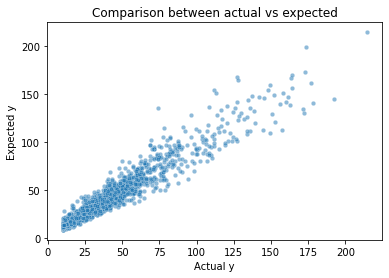

In [684]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.5,s=20)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

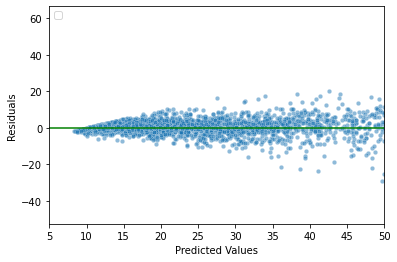

In [685]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

(array([6.000e+00, 1.000e+01, 5.700e+01, 2.920e+02, 2.966e+03, 2.310e+02,
        2.900e+01, 6.000e+00, 2.000e+00, 1.000e+00]),
 array([-47.11586643, -36.28511218, -25.45435793, -14.62360368,
         -3.79284943,   7.03790483,  17.86865908,  28.69941333,
         39.53016758,  50.36092183,  61.19167609]),
 <BarContainer object of 10 artists>)

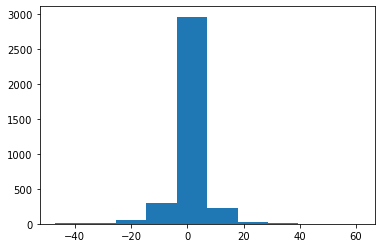

In [686]:
plt.hist(y_pred1-y_test1)

### KNNRegressor

In [687]:
from sklearn.neighbors import KNeighborsRegressor

In [688]:
scaler = MinMaxScaler()

In [689]:
knr = KNeighborsRegressor()

In [690]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [691]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [692]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [693]:
#df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]])

In [694]:
knr.fit(x_train, y_train)

KNeighborsRegressor()

In [695]:
y_pred = knr.predict(x_test)

In [696]:
y_test1 = np.e ** y_test-1
y_pred1 = np.e ** y_pred-1

In [697]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.8515620220632848 :
MAE score is 5.55059007865455 :
MSE score is 84.94145496704672 :


Text(0, 0.5, 'Expected y')

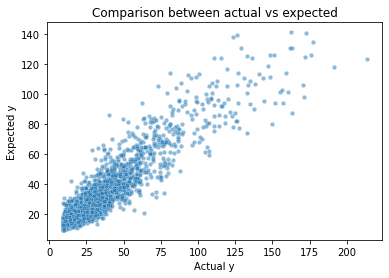

In [698]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.5,s=20)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

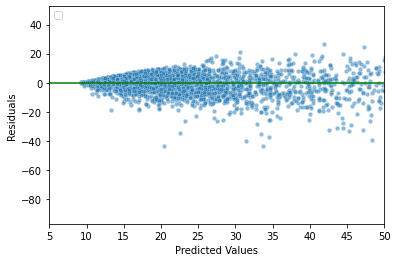

In [699]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

(array([1.000e+00, 6.000e+00, 6.000e+00, 2.300e+01, 7.100e+01, 3.420e+02,
        2.607e+03, 5.090e+02, 3.000e+01, 5.000e+00]),
 array([-90.21274837, -76.62244748, -63.03214659, -49.4418457 ,
        -35.85154481, -22.26124392,  -8.67094303,   4.91935786,
         18.50965875,  32.09995964,  45.69026053]),
 <BarContainer object of 10 artists>)

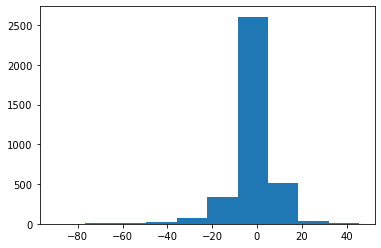

In [700]:
plt.hist(y_pred1-y_test1)

### SVM Regressor

In [701]:
from sklearn.svm import SVR

In [702]:
scaler = MinMaxScaler()

In [703]:
svr = SVR()

In [704]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [705]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [706]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [707]:
#df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]] = scaler.fit_transform(df[["duration","framerate","i","i_size","p_size","umem","o_bitrate","o_framerate","o_width"]])

In [708]:
svr.fit(x_train, y_train)

SVR()

In [709]:
y_pred = svr.predict(x_test)

In [710]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [711]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.9424271912748244 :
MAE score is 3.1330530549158717 :
MSE score is 32.94519507494791 :


Text(0, 0.5, 'Expected y')

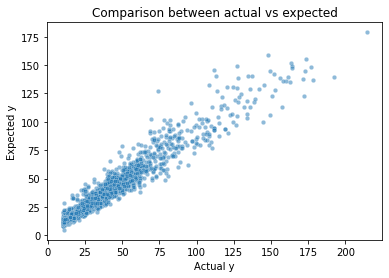

In [712]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.5,s=20)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

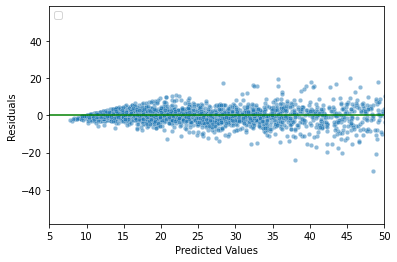

In [713]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

(array([5.000e+00, 5.000e+00, 3.300e+01, 1.030e+02, 1.723e+03, 1.654e+03,
        6.500e+01, 9.000e+00, 2.000e+00, 1.000e+00]),
 array([-52.94405803, -42.33922575, -31.73439348, -21.1295612 ,
        -10.52472893,   0.08010334,  10.68493562,  21.28976789,
         31.89460017,  42.49943244,  53.10426471]),
 <BarContainer object of 10 artists>)

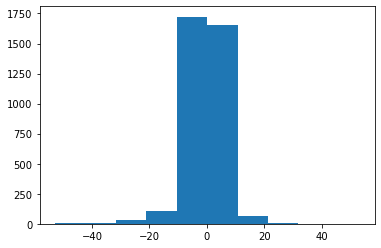

In [714]:
plt.hist(y_pred1-y_test1)

## Tuning Hyperparameters

In [796]:
from sklearn.model_selection import GridSearchCV

In [797]:
tree = DecisionTreeRegressor()

In [798]:
scaler = MinMaxScaler() 

In [799]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [800]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [801]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=1234)

In [802]:
param_grid = param_grid = [{'max_depth' : [20,22,24,26,28,30],
                            'min_samples_leaf':[4,6,8,10],
                            "criterion" : ["mse", "friedman_mse"],
                            "min_samples_split": [6,7,8]
                           }]

In [803]:
CV_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv= 5,n_jobs= 1 )

In [804]:
CV_tree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
             param_grid=[{'criterion': ['mse', 'friedman_mse'],
                          'max_depth': [20, 22, 24, 26, 28, 30],
                          'min_samples_leaf': [4, 6, 8, 10],
                          'min_samples_split': [6, 7, 8]}])

In [805]:
CV_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 6}

In [806]:
y_pred = CV_tree.predict(x_test)
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [807]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.9420050897760708 :
MAE score is 3.2783125236589714 :
MSE score is 33.18673646446478 :


### Tuning Ensambles methods

In [753]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [754]:
rfr = RandomForestRegressor()

In [755]:
scaler = MinMaxScaler() 

In [756]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [757]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [758]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=1234)

In [759]:
param_grid = [{'n_estimators' : [100,500],
               "criterion": ["mse","friedman_mse"],
               "max_depth" : [20,40],
               "min_samples_split": [5,7,9],
                "min_samples_leaf": [1,3,5]
              }]

In [760]:
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3,n_jobs= -1 )

In [761]:
CV_rfr.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['mse', 'friedman_mse'],
                          'max_depth': [20, 40], 'min_samples_leaf': [1, 3, 5],
                          'min_samples_split': [5, 7, 9],
                          'n_estimators': [100, 500]}])

In [762]:
CV_rfr.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [763]:
y_pred = CV_rfr.predict(x_test)
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [764]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.9673417727638659 :
MAE score is 2.3816264335956334 :
MSE score is 18.68819136881761 :


Text(0, 0.5, 'Expected y')

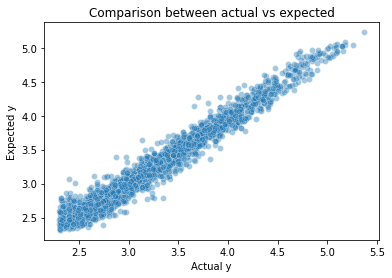

In [765]:
sns.scatterplot(x=y_test, y=y_pred, alpha=.4)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

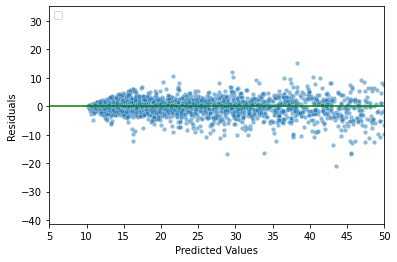

In [766]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

## GradientBoostingRegressor Tuned

In [808]:
from sklearn.ensemble import GradientBoostingRegressor

In [809]:
gbr = GradientBoostingRegressor()

In [810]:
scaler = MinMaxScaler() 

In [811]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [812]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [813]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=1234)

In [814]:
param_grid = [{'n_estimators' : [900,1200],
               "criterion": ["friedman_mse"],
               "learning_rate" : [0.55,0.6,0.65],
               "min_samples_split": [7,8,9],
                "min_samples_leaf": [2,3,4]
              }]

In [815]:
CV_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3,n_jobs= -1 )

In [816]:
CV_gbr.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid=[{'criterion': ['friedman_mse'],
                          'learning_rate': [0.55, 0.6, 0.65],
                          'min_samples_leaf': [2, 3, 4],
                          'min_samples_split': [7, 8, 9],
                          'n_estimators': [900, 1200]}])

In [817]:
CV_gbr.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.65,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 1200}

In [818]:
y_pred = CV_gbr.predict(x_test)
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [819]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.9919101399196381 :
MAE score is 1.177705646820294 :
MSE score is 4.629303735185173 :


Text(0, 0.5, 'Expected y')

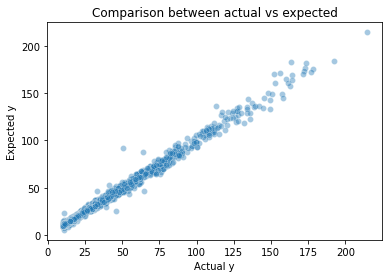

In [820]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.4)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

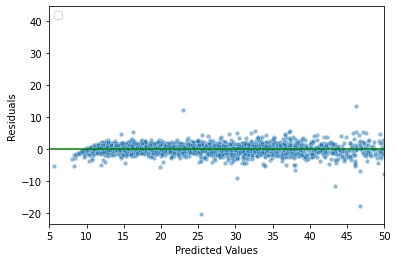

In [821]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

In [781]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

### SVM TUNED

In [782]:
svr1 = SVR()

In [783]:
scaler = MinMaxScaler() 

In [784]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width"]])

In [785]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [786]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30 ,random_state=1234)

In [787]:
param_grid = [{'kernel': ["rbf"],
               "degree" : [3],
               "gamma": ["scale"],
                "coef0": [0.0],
               "shrinking": [True], 
               "cache_size": [300],
               "C": [150]
              }]


In [788]:
CV_scr1 = GridSearchCV(estimator=svr1, param_grid=param_grid, cv=3,n_jobs= -1 )

In [789]:
CV_scr1.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [150], 'cache_size': [300], 'coef0': [0.0],
                          'degree': [3], 'gamma': ['scale'], 'kernel': ['rbf'],
                          'shrinking': [True]}])

In [790]:
CV_scr1.best_params_

{'C': 150,
 'cache_size': 300,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'shrinking': True}

In [791]:
y_pred = CV_scr1.predict(x_test)
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [792]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))


r2 score is 0.9719002134988962 :
MAE score is 2.1887162314087156 :
MSE score is 16.079690540413687 :


Text(0, 0.5, 'Expected y')

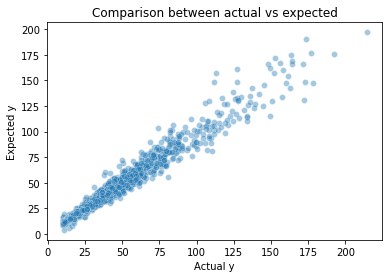

In [795]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.4)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

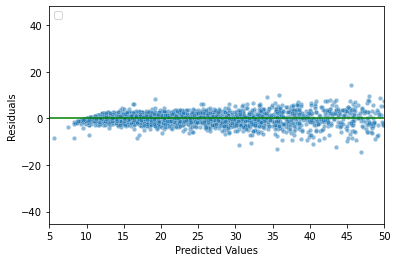

In [794]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

### Voting Regressor

In [715]:
from sklearn.ensemble import VotingRegressor

In [716]:
scaler = MinMaxScaler()

In [717]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [718]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [719]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [720]:
reg1 = GradientBoostingRegressor(n_estimators=1200,criterion="friedman_mse",learning_rate=0.60,
                                 min_samples_split=8, min_samples_leaf=3)
reg2 = RandomForestRegressor(criterion="friedman_mse",max_depth=25,min_samples_leaf=3,min_samples_split=5,n_estimators=500)
reg4 = SVR(kernel="rbf",degree=3,gamma="scale",coef0=0.0,shrinking=True, cache_size=300,C=150)
reg5 = MLPRegressor()
reg6 = KNeighborsRegressor()
ereg = VotingRegressor(estimators=[("gbr",reg1),('rf', reg2),("svr", reg4)])

In [721]:
ereg.fit(x_train, y_train)

VotingRegressor(estimators=[('gbr',
                             GradientBoostingRegressor(learning_rate=0.6,
                                                       min_samples_leaf=3,
                                                       min_samples_split=8,
                                                       n_estimators=1200)),
                            ('rf',
                             RandomForestRegressor(criterion='friedman_mse',
                                                   max_depth=25,
                                                   min_samples_leaf=3,
                                                   min_samples_split=5,
                                                   n_estimators=500)),
                            ('svr', SVR(C=150, cache_size=300))])

In [722]:
y_pred = ereg.predict(x_test)

In [723]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [724]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.9868034254071723 :
MAE score is 1.4903904558659593 :
MSE score is 7.551546188360582 :


Text(0, 0.5, 'Expected y')

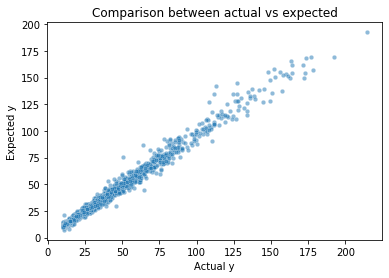

In [725]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.5,s=20)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

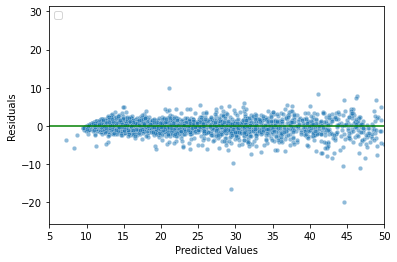

In [726]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])

(array([1.000e+01, 1.000e+01, 4.600e+01, 3.080e+02, 3.067e+03, 1.390e+02,
        1.200e+01, 4.000e+00, 2.000e+00, 2.000e+00]),
 array([-23.00682032, -17.83436772, -12.66191513,  -7.48946253,
         -2.31700993,   2.85544266,   8.02789526,  13.20034786,
         18.37280045,  23.54525305,  28.71770565]),
 <BarContainer object of 10 artists>)

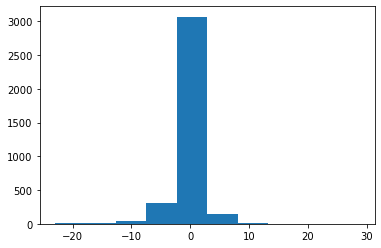

In [727]:
plt.hist(y_pred1-y_test1)

### Stacking Regression

In [728]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import StackingRegressor

In [729]:
scaler = MinMaxScaler()

In [730]:
X = df.drop(columns=["utime"], axis=1)
y = df.loc[:,"utime"]

In [731]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [732]:
df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]] = scaler.fit_transform(df[["bitrate","p","duration","framerate","i","i_size","p_size","o_bitrate","o_framerate","o_width","width"]])

In [733]:
estimators = [("gbr", GradientBoostingRegressor(n_estimators=1200,criterion="friedman_mse",learning_rate=0.60,
                                 min_samples_split=8, min_samples_leaf=3)),
              ("rfr", RandomForestRegressor(criterion="friedman_mse",max_depth=25,min_samples_leaf=3,min_samples_split=5,n_estimators=500)),
              ("svr", SVR(kernel="rbf",degree=3,gamma="scale",coef0=0.0,shrinking=True, cache_size=300,C=150)),
              ("mlp", MLPRegressor()),
              ("dtr", DecisionTreeRegressor())]

In [734]:
final_estimator = RidgeCV()
reg = StackingRegressor(estimators=estimators,final_estimator=final_estimator)

In [735]:
reg.fit(x_train, y_train)

StackingRegressor(estimators=[('gbr',
                               GradientBoostingRegressor(learning_rate=0.6,
                                                         min_samples_leaf=3,
                                                         min_samples_split=8,
                                                         n_estimators=1200)),
                              ('rfr',
                               RandomForestRegressor(criterion='friedman_mse',
                                                     max_depth=25,
                                                     min_samples_leaf=3,
                                                     min_samples_split=5,
                                                     n_estimators=500)),
                              ('svr', SVR(C=150, cache_size=300)),
                              ('mlp', MLPRegressor()),
                              ('dtr', DecisionTreeRegressor())],
                  final_estimator=RidgeCV(alphas=array([ 0.1, 

In [736]:
y_pred = reg.predict(x_test)

In [737]:
y_test1 = np.e ** y_test
y_pred1 = np.e ** y_pred

In [738]:
print("r2 score is {} :".format(r2_score(y_test1, y_pred1)))
print("MAE score is {} :".format(mean_absolute_error(y_test1, y_pred1)))
print("MSE score is {} :".format(mean_squared_error(y_test1, y_pred1)))

r2 score is 0.9920100410956271 :
MAE score is 1.1698871919639076 :
MSE score is 4.572136752992521 :


Text(0, 0.5, 'Expected y')

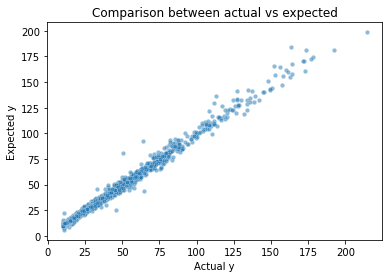

In [739]:
sns.scatterplot(x=y_test1, y=y_pred1, alpha=.5,s=20)
plt.title('Comparison between actual vs expected')
plt.xlabel('Actual y')
plt.ylabel('Expected y')

No handles with labels found to put in legend.


(5.0, 50.0)

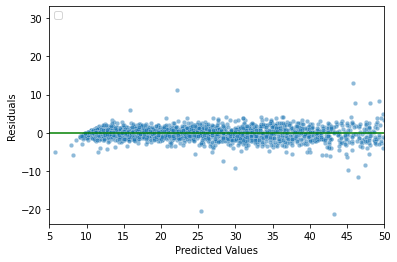

In [740]:
sns.scatterplot(x=y_pred1, y=y_pred1-y_test1, alpha=.5,s=20)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend(loc="upper left")
plt.hlines(y=0, xmin=-10, xmax=50, color="g")
plt.xlim([5,50])